# <font color='#FF6B1E'> Hotel Reccomendation System

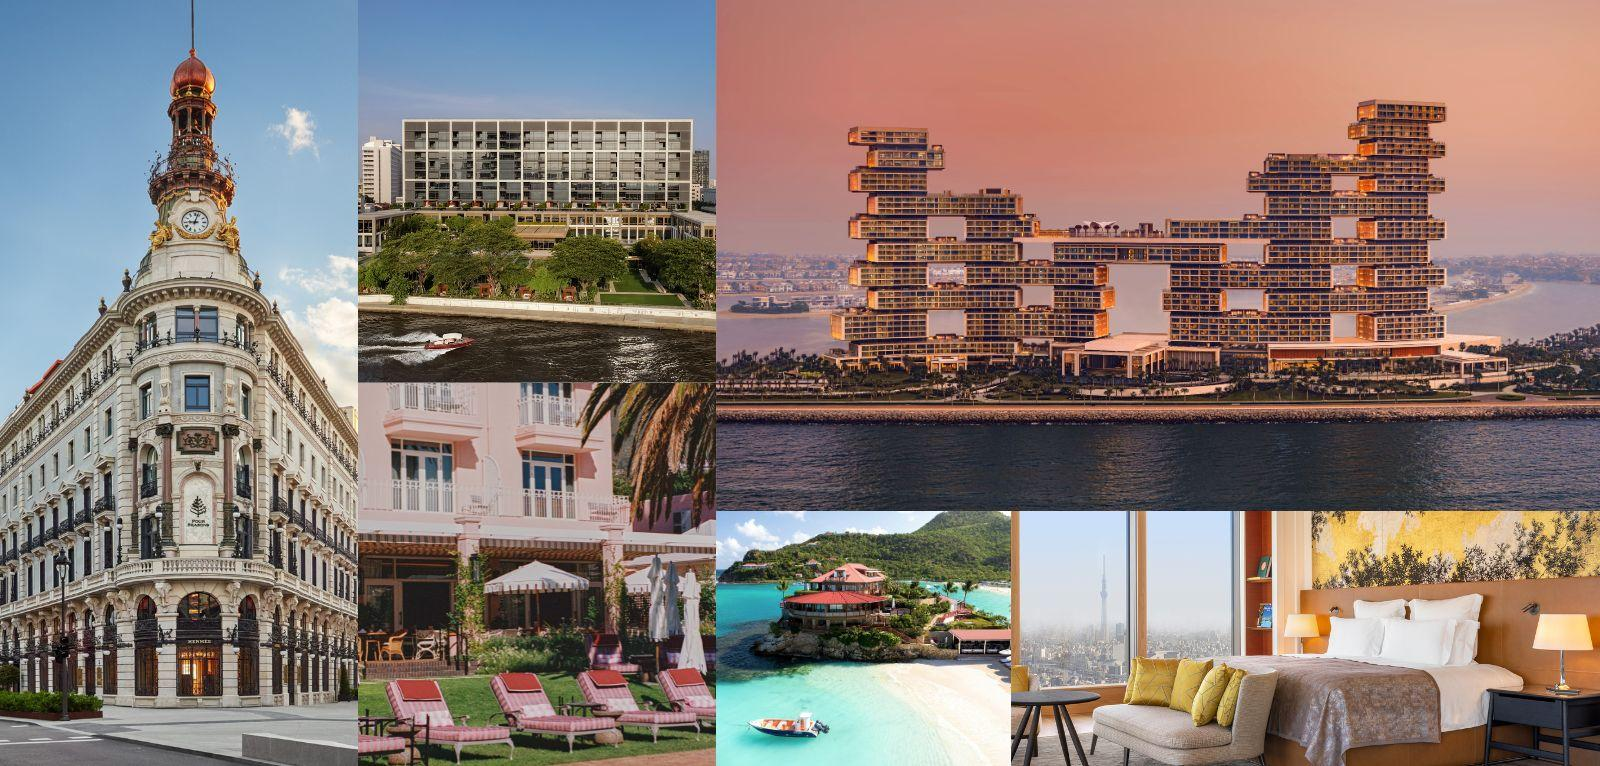

## <font color='#FF6B1E'> Introduction
In today's fast-paced world, selecting the perfect hotel is one of the first steps in planning any trip. With numerous websites providing hotel recommendations based on various criteria, choosing the right hotel can be overwhelming. To simplify this process, this project presents a **Hotel Recommendation System** using machine learning. The system leverages **customer reviews and ratings** to suggest hotels to users based on their preferences. In this project, we focus on analyzing customer feedback, including textual reviews and ratings, to recommend the most suitable hotels for different travel purposes such as business trips, honeymoons, and leisure stays.

## <font color='#FF6B1E'> Aim
The aim of this project is to develop a recommendation system that can predict which hotel a user is most likely to choose, based on the location and the description provided by the user. By analyzing the **reviews and tags** associated with hotels, we aim to rank hotels according to their relevance to the user's specified needs, such as the type of trip or specific requirements for accommodation. The system will also incorporate the hotel's average rating and user feedback to ensure that the recommendations are not only relevant but also highly rated by other travelers.

## <font color='#FF6B1E'> Dataset Explanation
The dataset used for this project contains information about hotel reviews, including customer feedback and hotel details from various countries. Below is a description of each column in the dataset:

1. **Hotel_Address**: The physical address of the hotel.
2. **Additional_Number_of_Scoring**: Additional numerical score, potentially related to customer reviews or features of the hotel.
3. **Review_Date**: The date when the review was posted.
4. **Average_Score**: The overall average score assigned to the hotel based on customer ratings.
5. **Hotel_Name**: The name of the hotel.
6. **Reviewer_Nationality**: The nationality of the reviewer.
7. **Negative_Review**: A textual description of the negative aspects of the hotel as reported by the reviewer.
8. **Review_Total_Negative_Word_Counts**: The total number of words in the negative review.
9. **Total_Number_of_Reviews**: The total number of reviews the hotel has received.
10. **Positive_Review**: A textual description of the positive aspects of the hotel as reported by the reviewer.
11. **Review_Total_Positive_Word_Counts**: The total number of words in the positive review.
12. **Total_Number_of_Reviews_Reviewer_Has_Given**: The total number of reviews provided by the specific reviewer.
13. **Reviewer_Score**: The score given by the reviewer to the hotel.
14. **Tags**: A list of tags related to the review, such as the type of trip or room preferences.
15. **Days_Since_Review**: The number of days since the review was posted.
16. **Lat**: The latitude of the hotel's location.
17. **Lng**: The longitude of the hotel's location.

## <font color='#FF6B1E'> Requirements

In [330]:
import nltk
#nltk.download('wordnet')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval
from nltk.stem import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')

## <font color='#FF6B1E'> Import Data

In [254]:
df=pd.read_csv('Hotel_Reviews.csv')

## <font color='#FF6B1E'> EDA (Exploratory Data Analysis)

In [256]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [257]:
df.shape

(515738, 17)

In [258]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [259]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Average_Score,515738.0,8.397487,0.548048,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,8.395077,1.637856,2.500000,7.500000,8.800000,9.600000,10.000000
lat,512470.0,49.442439,3.466325,41.328376,48.214662,51.499981,51.516288,52.400181
lng,512470.0,2.823803,4.579425,-0.369758,-0.143372,0.010607,4.834443,16.429233


In [260]:
df['Reviewer_Nationality'].unique()

array([' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ',
       ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ',
       ' Italy ', ' Canada ', ' Netherlands ', ' Germany ',
       ' United States of America ', ' Hungary ', ' Israel ',
       ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ',
       ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ',
       ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ',
       ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ',
       ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ',
       ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ',
       ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ',
       ' Liechtenstein ', ' Chile ', ' Hong Kong ',
       ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ',
       ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ',
       ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ',
       ' Guerns

In [261]:
df['Hotel_Address'].nunique()

1493

## <font color='#FF6B1E'> Feature Engineering

In [263]:
df['Hotel_Address']=df['Hotel_Address'].str.replace('United Kingdom','UK')

In [264]:
df['country']=df['Hotel_Address'].apply(lambda x:x.split(' ')[-1])

In [289]:
df['country']=df['country'].str.lower()

In [265]:
df.sample(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,country
253416,81 Great Eastern Street Islington London EC2A ...,524,11/26/2016,9.0,The Hoxton Shoreditch,United Kingdom,No Negative,0,1732,Excellent service very helpful polite staff L...,16,3,9.6,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",250 day,51.525514,-0.082927,UK
510456,Wibautstraat 129 Oost 1091 GL Amsterdam Nether...,975,8/9/2016,8.7,The Student Hotel Amsterdam City,Russia,Breakfast was not varied,5,7656,Location view from the room,7,3,7.1,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",359 day,52.354665,4.913164,Netherlands
38993,12 Lancaster Gate Lancaster Gate Westminster B...,440,12/15/2016,8.0,Best Western Mornington Hotel Hyde Park,Hong Kong,good,2,2418,good,2,11,8.8,"[' Business trip ', ' Solo traveler ', ' Singl...",231 day,51.511993,-0.178279,UK


In [266]:
df['country'].unique()

array(['Netherlands', 'UK', 'France', 'Spain', 'Italy', 'Austria'],
      dtype=object)

In [267]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'country'],
      dtype='object')

In [268]:
df=df[['Hotel_Address', 
       'Average_Score', 'Hotel_Name', 
       'Total_Number_of_Reviews', 'Positive_Review',
        'Tags', 'country']]

In [293]:
df.sample(3)

,Hotel_Address,Average_Score,Hotel_Name,Total_Number_of_Reviews,Positive_Review,Tags,country
48698,14 16 Craven Hill Lancaster Gate Westminster B...,8.8,Park Grand London Lancaster Gate,1519,The staff are amazing and go out of their way,leisure trip solo traveler deluxe double ro...,uk
416942,Plaza Parade Camden London NW6 5RP UK,8.1,London Marriott Maida Vale,1042,Well located for Central london and plenty of...,leisure trip solo traveler deluxe king room...,uk
412913,Pla a Rosa dels Vents 1 Passeig Joan de Borbo ...,8.5,W Barcelona,2708,Absolutely everything Hotel is beautiful Pool...,leisure trip couple mega room stayed 1 nig...,spain


In [270]:
def join(column):
    column=column[0]
    if(type(column)!=list):
        return ''.join(literal_eval(column))
    else:
        return column

In [271]:
df['Tags']=df[['Tags']].apply(join,axis=1)

In [291]:
df['Tags']=df['Tags'].str.lower()

In [322]:
stop_words = stopwords.words('english')
df['Tags']=[word for word in df['Tags'] if not word in stop_words]

In [332]:
engStemmer=SnowballStemmer('english')
df['Tags']=df['Tags'].apply(lambda x: nltk.word_tokenize(x))
df['Tags'] = df['Tags'].apply(lambda x: [engStemmer.stem(word) for word in x])
df['Tags']=df['Tags'].apply(lambda x:' '.join(x))

In [392]:
df.to_csv('edited_hotel_list.csv', index=False)

## <font color='#FF6B1E'> Recommendation

In [386]:
def recommend_hotel(location,description):
    description=description.lower()
    location=location.lower()

    word_tokenize(description)
    stop_words = stopwords.words('english')
    lemma=WordNetLemmatizer()
    filtered_description={word for word in description if not word in stop_words}
    filtered_description_set=set()

    for word in filtered_description:
        filtered_description_set.add(lemma.lemmatize(word))

    country=df[df['country']==location]
    country=country.set_index(np.arange(country.shape[0]))
    
    
    cos=[]

    for i in range(country.shape[0]):
        temp_tokens = set(word_tokenize(country['Tags'][i]))
        vector = temp_tokens.intersection(filtered_description_set)
        cos.append(len(vector))
    country['similarity']=cos
    country.sort_values(by=['similarity','Average_Score'],ascending=False,inplace=True)
    country.drop_duplicates(subset='Hotel_Name',keep='first',inplace=True)
    country.reset_index(inplace=True)
    return country[['Hotel_Name','Average_Score','Hotel_Address']].head(20)

In [388]:
country=recommend_hotel('Italy', 'I am going for a business trip')
country

,Hotel_Name,Average_Score,Hotel_Address
0,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,Piazza Duca D Aosta 9 Central Station 20124 Mi...
1,Palazzo Parigi Hotel Grand Spa Milano,9.3,Corso Di Porta Nuova 1 Milan City Center 20121...
2,Room Mate Giulia,9.3,Silvio Pellico 4 Milan City Center 20121 Milan...
3,UNA Maison Milano,9.3,Via Mazzini 4 Milan City Center 20123 Milan Italy
4,Hotel Spadari Al Duomo,9.3,Via Spadari 11 Milan City Center 20123 Milan I...
5,ME Milan Il Duca,9.2,Piazza della Repubblica 13 Central Station 201...
6,The Yard Milano,9.2,Piazza XXIV Maggio 8 Milan City Center 20123 M...
7,Mandarin Oriental Milan,9.2,Via Andegari 9 Milan City Center 20121 Milan I...
8,Armani Hotel Milano,9.2,Via Manzoni 31 Milan City Center 20121 Milan I...
9,Hotel Berna,9.2,Via Napo Torriani 18 Central Station 20124 Mil...


In [390]:
recommend_hotel('UK','I am going on a honeymoon, I need a honeymoon suite room for 3 nights')

,Hotel_Name,Average_Score,Hotel_Address
0,Haymarket Hotel,9.6,1 Suffolk Place Westminster Borough London SW1...
1,41,9.6,41 Buckingham Palace Road Westminster Borough ...
2,Milestone Hotel Kensington,9.5,1 Kensington Court Kensington and Chelsea Lond...
3,Charlotte Street Hotel,9.5,15 17 Charlotte Street Hotel Westminster Borou...
4,The Soho Hotel,9.5,4 Richmond Mews Westminster Borough London W1D...
5,Taj 51 Buckingham Gate Suites and Residences,9.5,Buckingham Gate Westminster Borough London SW1...
6,Ham Yard Hotel,9.5,One Ham Yard Westminster Borough London W1D 7D...
7,Intercontinental London The O2,9.4,1 Waterview Drive Greenwich London SE10 0TW UK
8,Covent Garden Hotel,9.4,10 Monmouth Street Camden London WC2H 9HB UK
9,Lansbury Heritage Hotel,9.4,117 Poplar High Street Tower Hamlets London E1...


## <font color='#FF6B1E'>Conclusion

In this project, we have developed a hotel recommendation system that provides personalized hotel suggestions based on the user's input regarding the country and the purpose of their stay. By leveraging customer tags associated with hotels, the system is able to recommend the most relevant hotels that align with the user's specified requirements. The recommendation system ranks hotels according to their similarity to the user's description, ensuring that the suggestions not only match the location but also cater to the specific nature of the trip, whether it be for business, leisure, or other purposes. This approach allows users to make more informed decisions when selecting a hotel, ultimately enhancing their overall travel experience.